In [ ]:
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn.ensemble as sk
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer_multidim
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Pre-Processing**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Assignment 3/dataset/population.csv")
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,0,0,0,Joint both 65+,Not in universe,Not in universe,Householder,Householder,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,6418,0,9,Joint one under 65 & one 65+,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,157,Joint both under 65,Not in universe,Not in uni

In [ ]:

np.random.seed(0)
columns=df.columns
length=[]

df.replace(to_replace = " ?", value = np.NaN,inplace=True)

for i in columns:
  length.append(len(df[columns]))
print("No of Missing values")
for i in columns:
  print(i,df[i].isnull().sum())
for i in columns:
    percentage=(df[i].isnull().sum()/len(df[i]))*100
    #print(i+" ",percentage)
    if(percentage>40):
        df.drop(i,axis=1,inplace=True)
        

print((len(columns)- len(df.columns)),"Column drop from the DataFrame")
print("\nDropped Columns Are :")
for i in columns:
  if(i not in df.columns):
    print(i)
columns=df.columns
# print(len(columns))   
# print(len(df.columns))


No of Missing values
AAGE 0
ACLSWKR 0
ADTIND 0
ADTOCC 0
AHGA 0
AHRSPAY 0
AHSCOL 0
AMARITL 0
AMJIND 0
AMJOCC 0
ARACE 0
AREORGN 0
ASEX 0
AUNMEM 0
AUNTYPE 0
AWKSTAT 0
CAPGAIN 0
CAPLOSS 0
DIVVAL 0
FILESTAT 0
GRINREG 0
GRINST 708
HHDFMX 0
HHDREL 0
MIGMTR1 99696
MIGMTR3 99696
MIGMTR4 99696
MIGSAME 0
MIGSUN 99696
NOEMP 0
PARENT 0
PEFNTVTY 6713
PEMNTVTY 6119
PENATVTY 3393
PRCITSHP 0
SEOTR 0
VETQVA 0
VETYN 0
WKSWORK 0
YEAR 0
4 Column drop from the DataFrame

Dropped Columns Are :
MIGMTR1
MIGMTR3
MIGMTR4
MIGSUN


## **Feature Analysis**

In [ ]:
description=pd.read_csv("/content/drive/MyDrive/Assignment 3/dataset/Dataset Description.csv")
#print(description["Column Code"])
categorical=[]
numerical=[]
for i in range(len(description["Column Code"])):
  for j in columns:
    if(j==description["Column Code"][i]):
      if(description["Type"][i]=='numerical'):
        numerical.append(j)
      else:
        categorical.append(j)

print(categorical)
print(numerical)







['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'YEAR']
['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'WKSWORK']


# **Plot Numerical data**

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

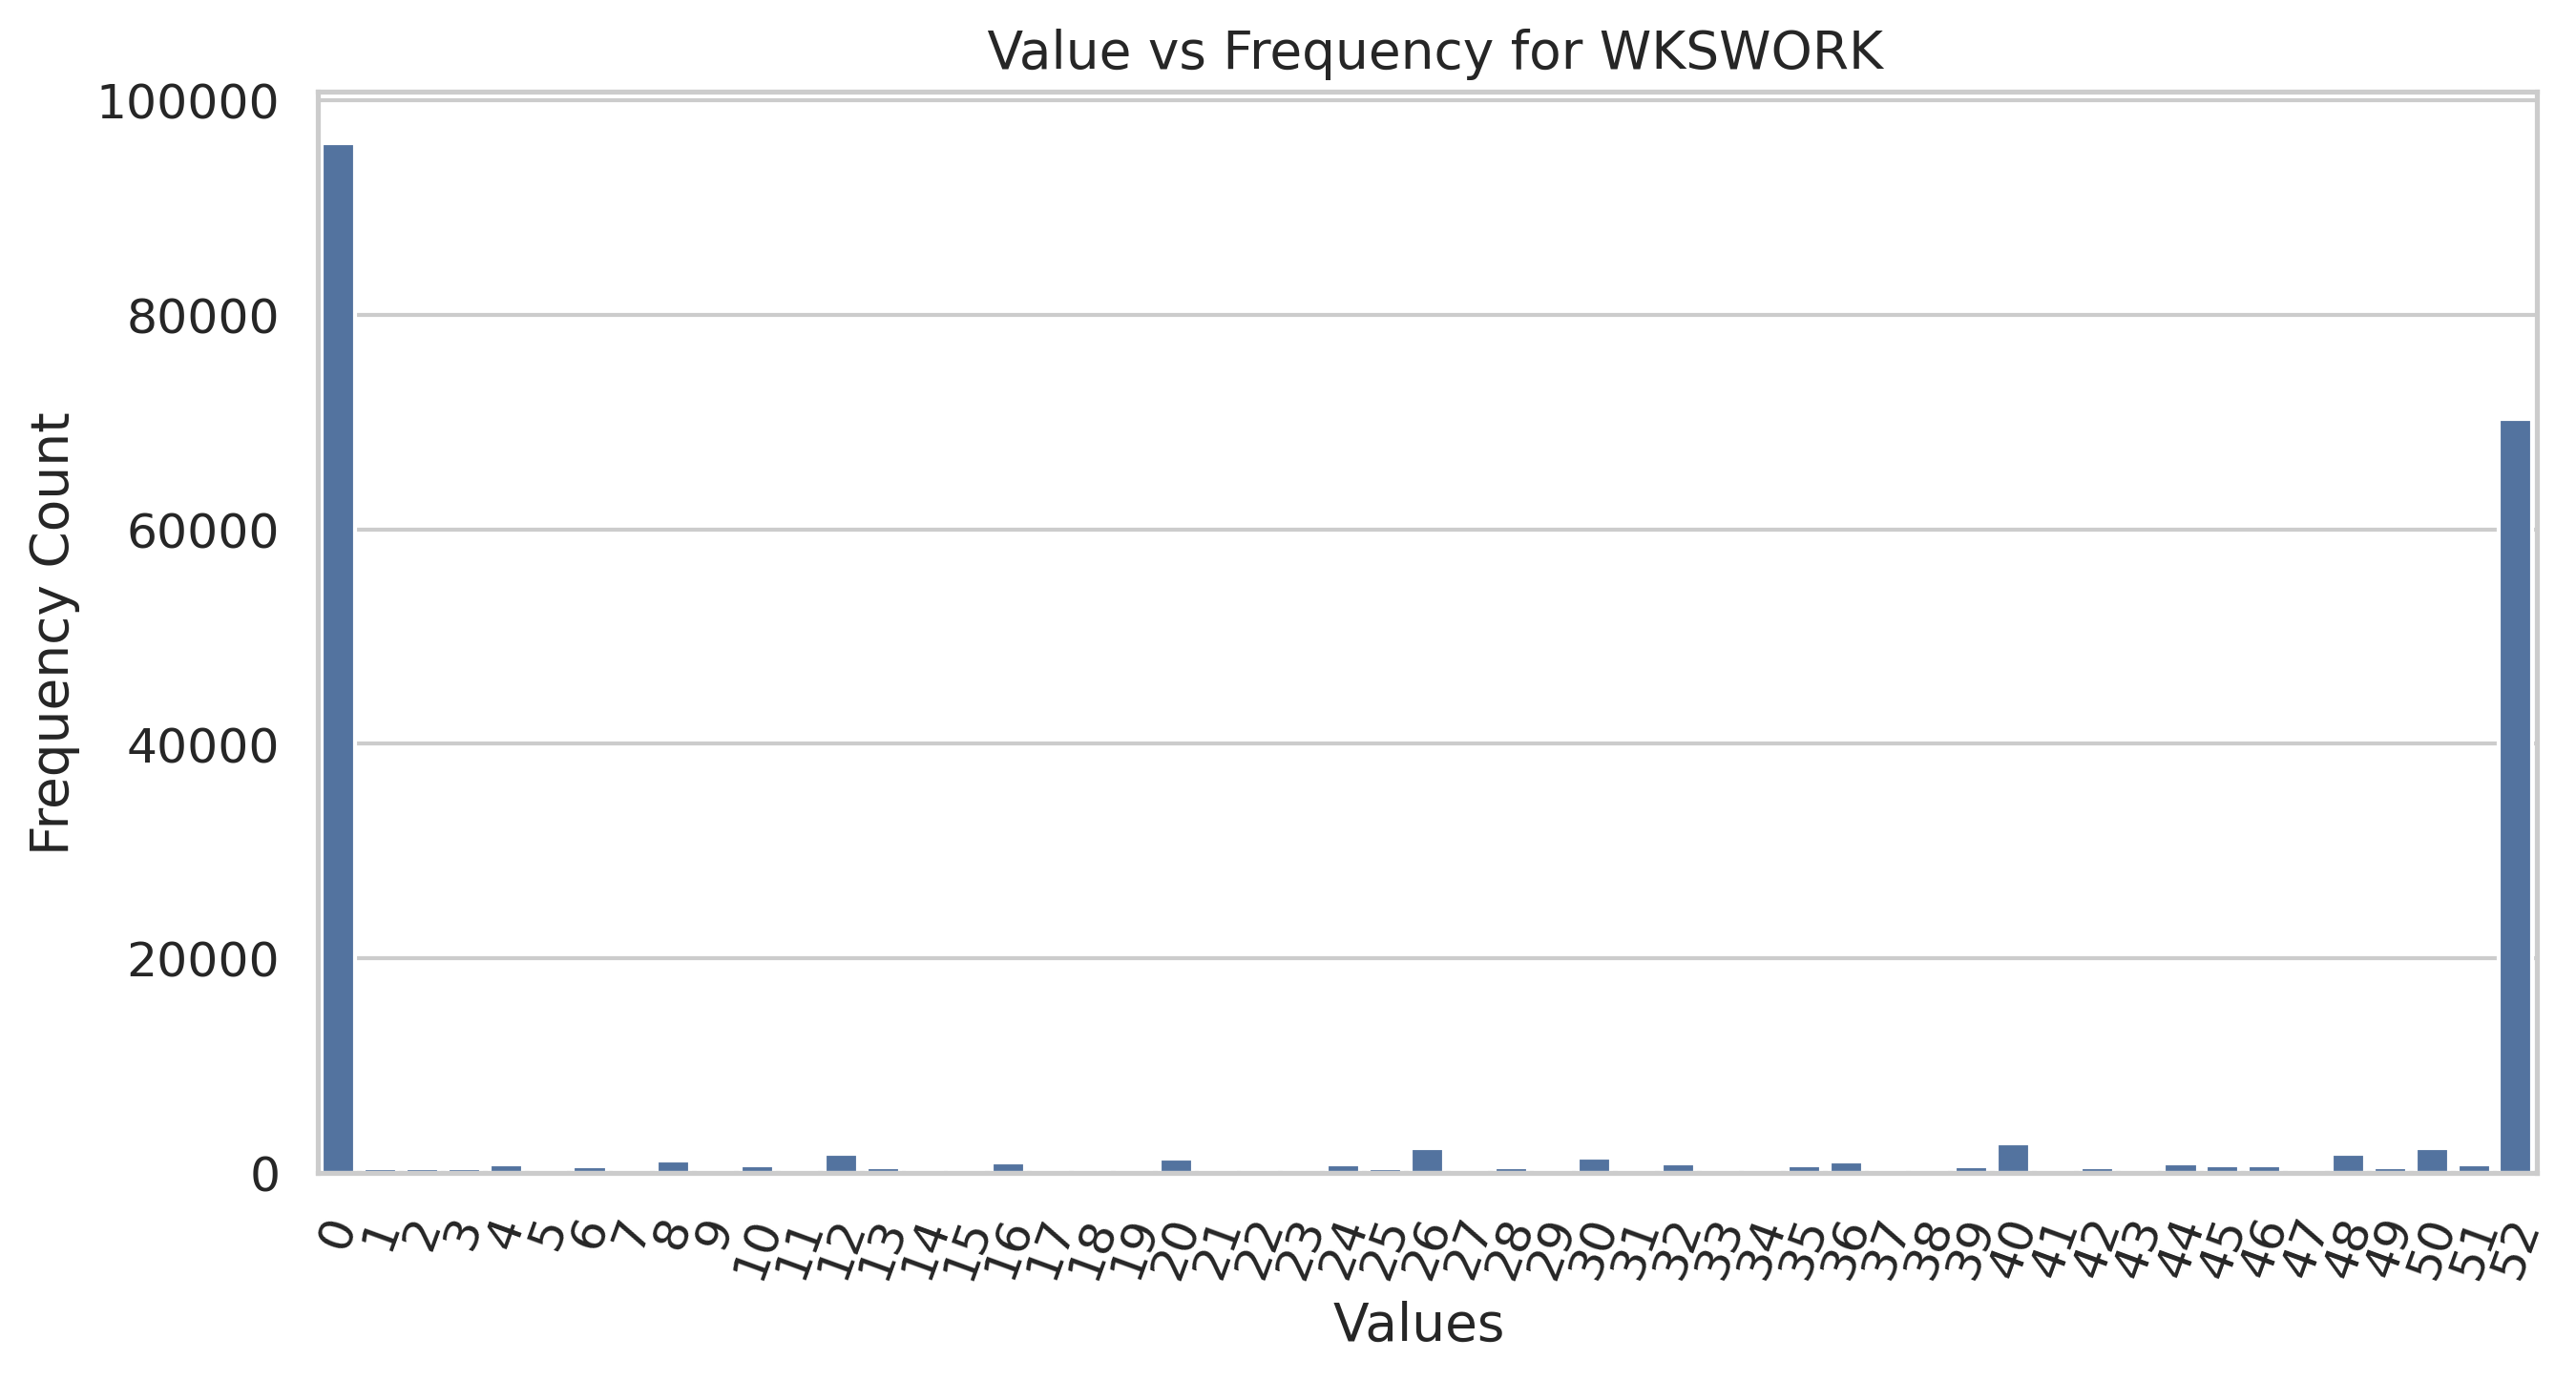

In [ ]:
for i in numerical:
  x=dict(df[i].value_counts())
  #print(list(x.keys()))
  #print(list(x.values()))
  plt.clf()
  plt.xticks(rotation=70)
  sns.set(style='whitegrid', palette="deep" ,font_scale=1.1 )
  sns.barplot(x=list(x.keys()),y=list(x.values()),color='#4671AC').set(xlabel='Values ', ylabel='Frequency Count');
  plt.title(" Value vs Frequency for "+ i)
  plt.savefig("/content/drive/MyDrive/Assignment 3/plots/Numerical/histogram of "+i+".png")



# **Plot Categorical data**

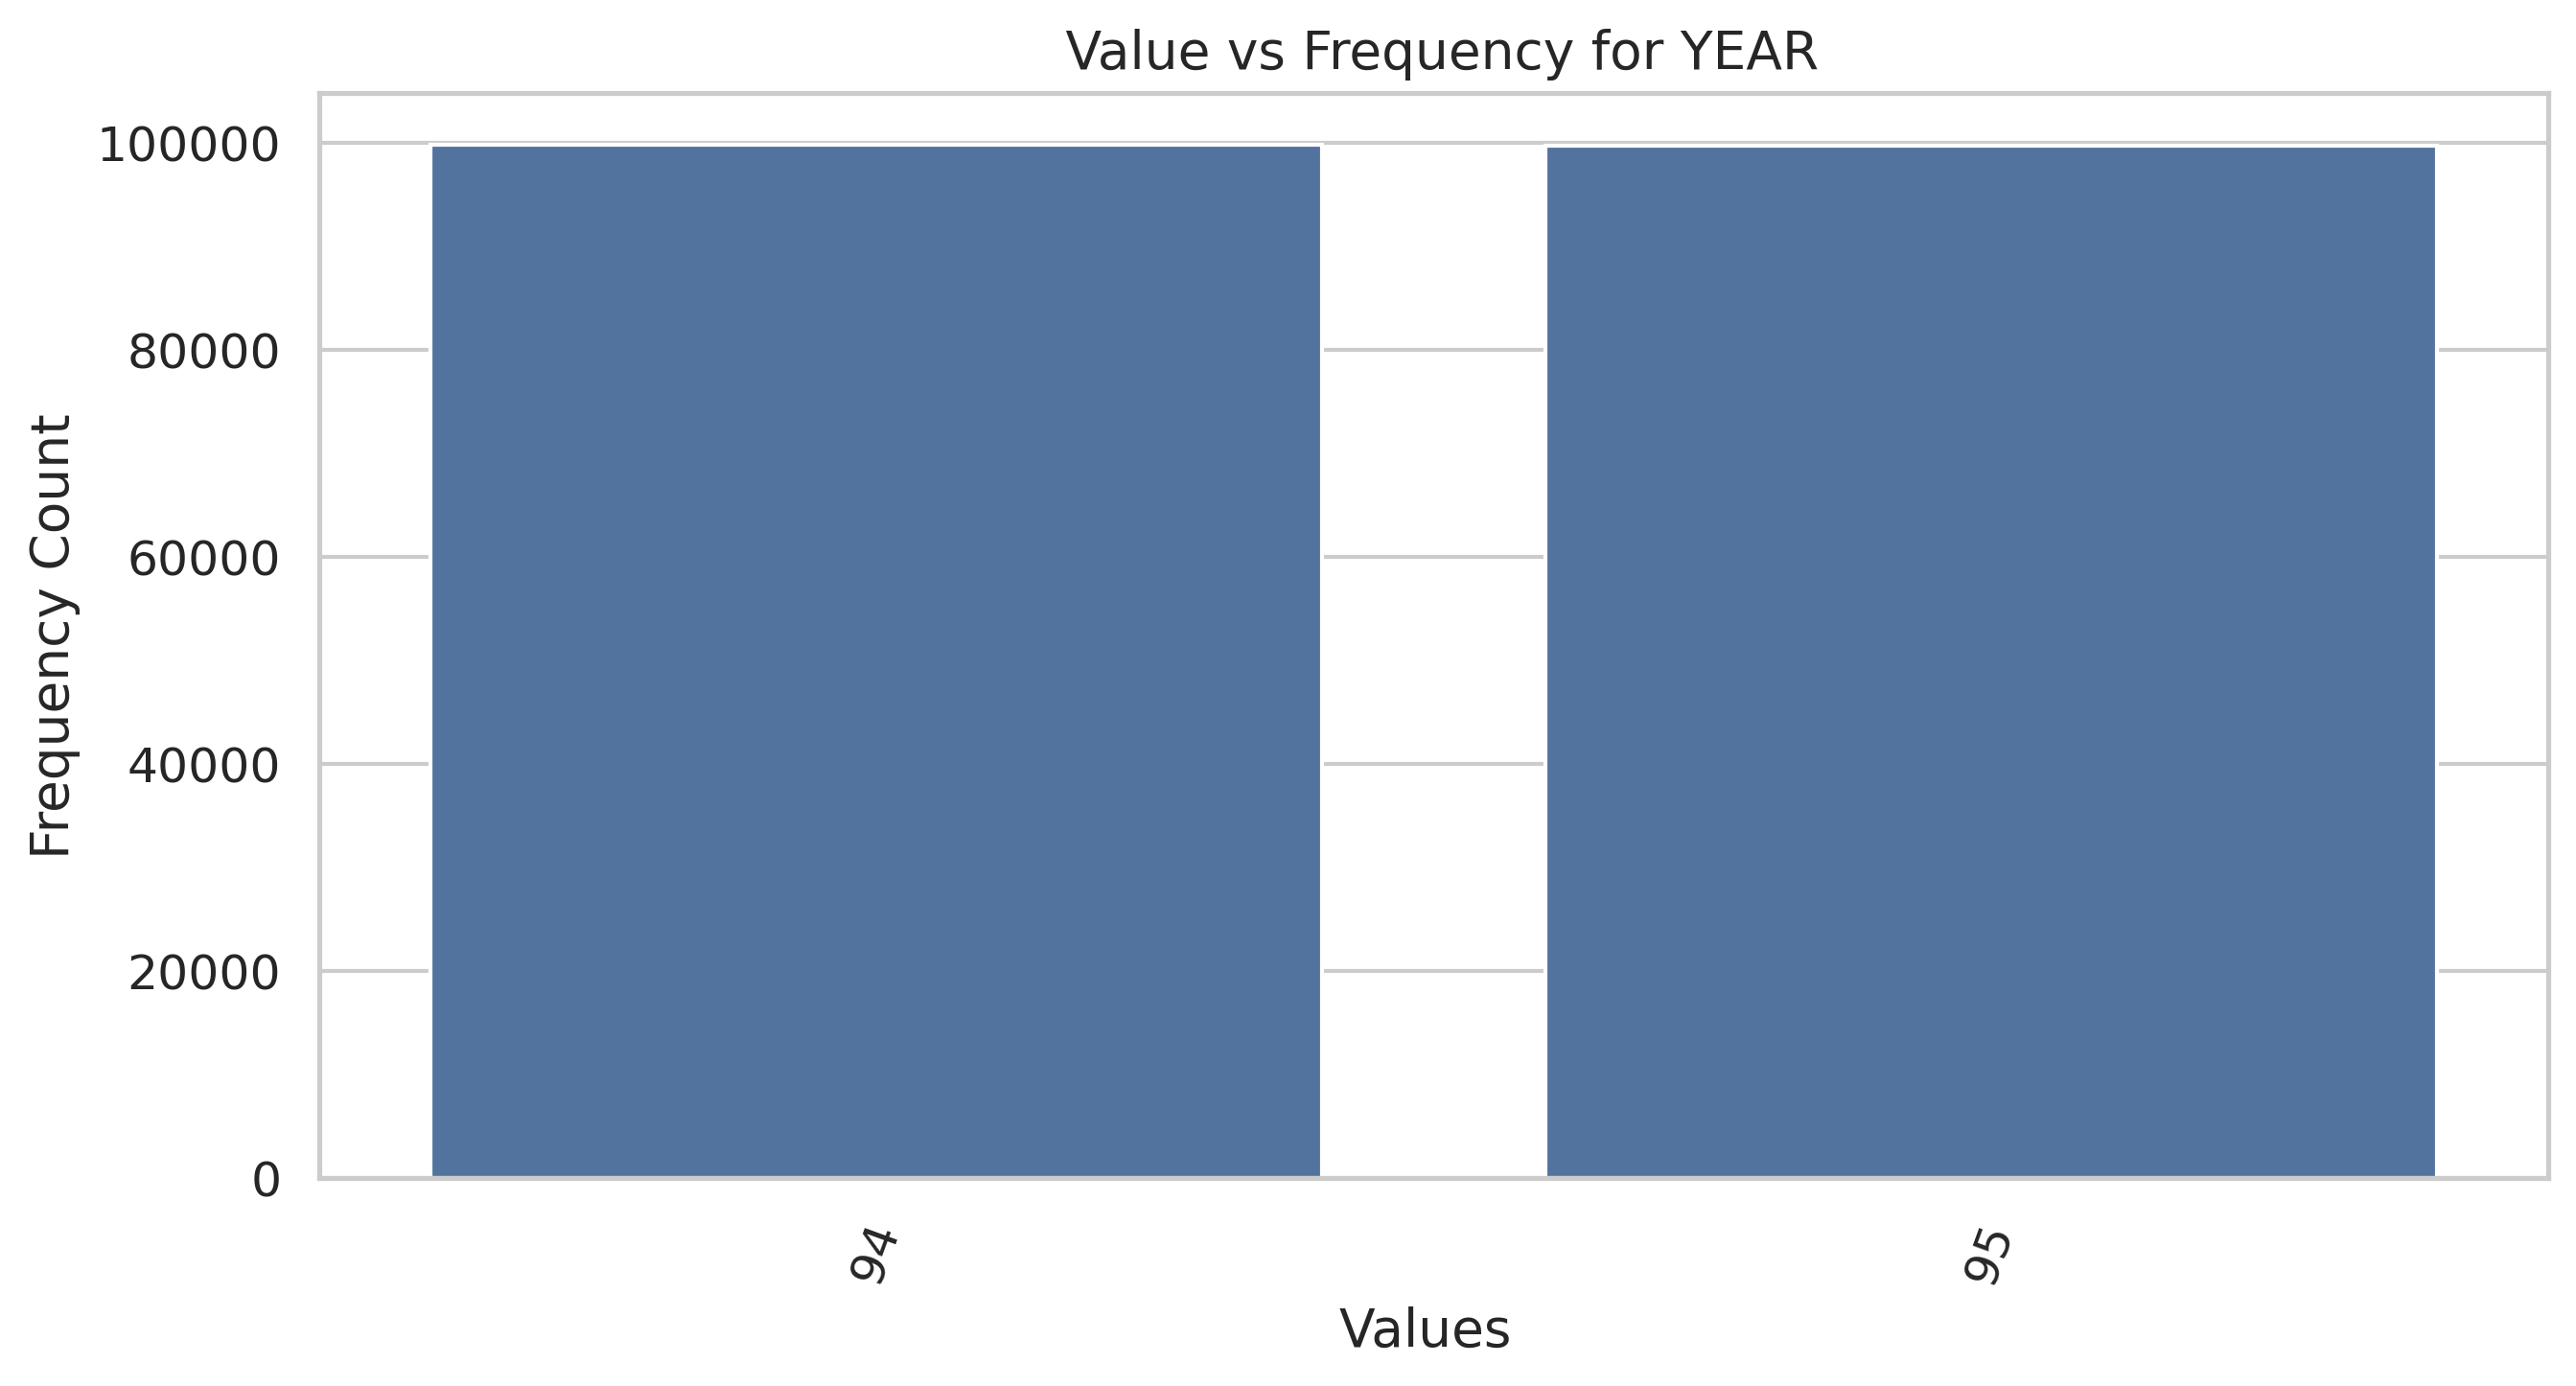

In [ ]:
for i in categorical:
  x=dict(df[i].value_counts())
  #print(list(x.keys()))
  #print(list(x.values()))
  plt.clf()
  plt.xticks(rotation=70)
  sns.set(style='whitegrid', palette="deep" ,font_scale=1.1 )
  sns.barplot(x=list(x.keys()),y=list(x.values()),color='#4671AC').set(xlabel='Values ', ylabel='Frequency Count');
  plt.title(" Value vs Frequency for "+ i)
  plt.savefig("/content/drive/MyDrive/Assignment 3/plots/Categorical/histogram of "+i+".png")

In [ ]:
dropped_col=[]
for i in df.columns:
  x=dict(df[i].value_counts())
  if(max(x.values())>0.8*len(df)):
    dropped_col.append(i)
print(dropped_col,len(dropped_col))

for i in dropped_col:
  df.drop(i,axis=1,inplace=True)

print(len(df.columns))


['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA'] 16
20


# **Imputation, Bucketization, One-Hot Encoding**

Replacing with the Mode

In [ ]:
columns=df.columns
mode=[]

for i in columns:
  mod=df[i].mode()
  mode.append(mod)
  df[i].replace(to_replace = np.NaN, value = mod.get(i),inplace=True)

print(df.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [ ]:
df.dtypes

AAGE         int64
ACLSWKR     object
ADTIND       int64
ADTOCC       int64
AHGA        object
AMARITL     object
AMJIND      object
AMJOCC      object
ASEX        object
AWKSTAT     object
FILESTAT    object
HHDFMX      object
HHDREL      object
MIGSAME     object
NOEMP        int64
PARENT      object
PEFNTVTY    object
VETYN        int64
WKSWORK      int64
YEAR         int64
dtype: object

Bucketize the Numerical features

In [ ]:
numerical.clear()
categorical.clear()
columns=df.columns
columns
for i in range(len(description["Column Code"])):
  for j in columns:
    if(j==description["Column Code"][i]):
      if(description["Type"][i]=='numerical'):
        numerical.append(j)
      else:
        categorical.append(j)
print(numerical)
print(categorical)


['AAGE', 'WKSWORK']
['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND', 'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'VETYN', 'YEAR']


Converting AAGE to Categorical

In [ ]:
df['AAGE']=pd.cut(df['AAGE'], bins=[1,15,25,65,100],labels=['Child','Youth', 'Adult','Senior '] , include_lowest=True)

Converting WKSWORK to Categorical

In [ ]:
df['WKSWORK']=pd.cut(df['WKSWORK'], bins=[0,7,20,35,100],labels=['Fresher','Experienced', 'Highly-Experienced','Senior '],include_lowest=True )

In [ ]:
print(df['AAGE'].dtype)
print(df['WKSWORK'].dtype)

category
category


In [ ]:
df[['AAGE','WKSWORK']]

,AAGE,WKSWORK
0,Senior,Fresher
1,Adult,Senior
2,Youth,Fresher
3,Child,Fresher
4,Child,Fresher
...,...,...
199518,Senior,Fresher
199519,Adult,Senior
199520,Adult,Senior
199521,Youth,Fresher


# **One Hot Encoding**

In [ ]:
categorical
df[categorical]=df[categorical].astype('object')

In [ ]:
df.dtypes

AAGE        category
ACLSWKR       object
ADTIND        object
ADTOCC        object
AHGA          object
AMARITL       object
AMJIND        object
AMJOCC        object
ASEX          object
AWKSTAT       object
FILESTAT      object
HHDFMX        object
HHDREL        object
MIGSAME       object
NOEMP         object
PARENT        object
PEFNTVTY      object
VETYN         object
WKSWORK     category
YEAR          object
dtype: object

In [ ]:
enc_data=pd.get_dummies(df)
enc_data

,AAGE_Child,AAGE_Youth,AAGE_Adult,AAGE_Senior,ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,ACLSWKR_ Not in universe,ACLSWKR_ Private,ACLSWKR_ Self-employed-incorporated,ACLSWKR_ Self-employed-not incorporated,ACLSWKR_ State government,ACLSWKR_ Without pay,ADTIND_0,ADTIND_1,ADTIND_2,ADTIND_3,ADTIND_4,ADTIND_5,ADTIND_6,ADTIND_7,ADTIND_8,ADTIND_9,ADTIND_10,ADTIND_11,ADTIND_12,ADTIND_13,ADTIND_14,ADTIND_15,ADTIND_16,ADTIND_17,ADTIND_18,ADTIND_19,ADTIND_20,ADTIND_21,ADTIND_22,ADTIND_23,ADTIND_24,ADTIND_25,ADTIND_26,...,PEFNTVTY_ Greece,PEFNTVTY_ Guatemala,PEFNTVTY_ Haiti,PEFNTVTY_ Holand-Netherlands,PEFNTVTY_ Honduras,PEFNTVTY_ Hong Kong,PEFNTVTY_ Hungary,PEFNTVTY_ India,PEFNTVTY_ Iran,PEFNTVTY_ Ireland,PEFNTVTY_ Italy,PEFNTVTY_ Jamaica,PEFNTVTY_ Japan,PEFNTVTY_ Laos,PEFNTVTY_ Mexico,PEFNTVTY_ Nicaragua,PEFNTVTY_ Outlying-U S (Guam USVI etc),PEFNTVTY_ Panama,PEFNTVTY_ Peru,PEFNTVTY_ Philippines,PEFNTVTY_ Poland,PEFNTVTY_ Portugal,PEFNTVTY_ Puerto-Rico,PEFNTVTY_ Scotland,PEFNTVTY_ South Korea,PEFNTVTY_ Taiwan,PEFNTVTY_ Thailand,PEFNTVTY_ Trinadad&Tobago,PEFNTVTY_ United-States,PEFNTVTY_ Vietnam,PEFNTVTY_ Yugoslavia,VETYN_0,VETYN_1,VETYN_2,WKSWORK_Fresher,WKSWORK_Experienced,WKSWORK_Highly-Experienced,WKSWORK_Senior,YEAR_94,YEAR_95
0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
199519,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
199520,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
199521,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1


# **Clustering**

In [ ]:
def get_inertia(clusters,medians,sample):
    ls=[]
    def euclidean_distance(p1, p2) :
        squareSum = 0
        ls.append(squareSum)
        n = len(p1)
        for i in range(n) :
            ls.append(squareSum)
            squareSum += (p1[i] - p2[i]) ** 2
        return squareSum ** 0.5
    
    n = len(clusters)
    ls.append(n)
    inertia = 0
    for i in range(n) :
        ls.append(i)
        for cc in clusters[i] :
            ls.append(cc)
            inertia+= euclidean_distance(sample.iloc[cc,:], medians[i])
    return inertia

PCA

In [ ]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(enc_data)
features = range(pca.n_components_)

In [43]:
K = range(10, 25)
inertias = []
op=[]
for k in K:
    sample=pd.DataFrame(principalComponents).iloc[:,:3]
    op.append(sample)
    initial_medians = [np.random.random(3) for _ in range(k)]
    op.append(initial_medians)
    kmedians_instance = kmedians(sample, initial_medians)
    kmedians_instance.process()
    op.append(kmedians_instance.process())
    clusters = kmedians_instance.get_clusters()
    medians = kmedians_instance.get_medians()
    op.append(medians)
    inertias.append(get_inertia(clusters,medians,sample))
    print(k,end=" ")
inertias

10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

[110857.31317646809,
 91259.6321039659,
 100340.86490750808,
 82872.47441665066,
 86219.07782689077,
 95205.93533835828,
 77283.59549364499,
 84421.52970534025,
 85147.68665399645,
 73016.94483418467,
 68918.89919949813,
 84780.784270873,
 85057.57620621375,
 68077.3033538712,
 76809.4017681806]

In [ ]:
inertias=[102536.79618115001,
92809.19602430594,
 95575.95619293742,
 88741.93044627353,
 80831.43324570809,
 89418.20871266331,
 92251.19963419063,
 80708.28701007525,
 78356.36605211883,
 79381.60516560059,
 76545.43751817633,
 67001.08224265883,
 72679.38741127352,
 69805.48057351643,
 64704.107126934134]
inertias

[102536.79618115001,
 92809.19602430594,
 95575.95619293742,
 88741.93044627353,
 80831.43324570809,
 89418.20871266331,
 92251.19963419063,
 80708.28701007525,
 78356.36605211883,
 79381.60516560059,
 76545.43751817633,
 67001.08224265883,
 72679.38741127352,
 69805.48057351643,
 64704.107126934134]

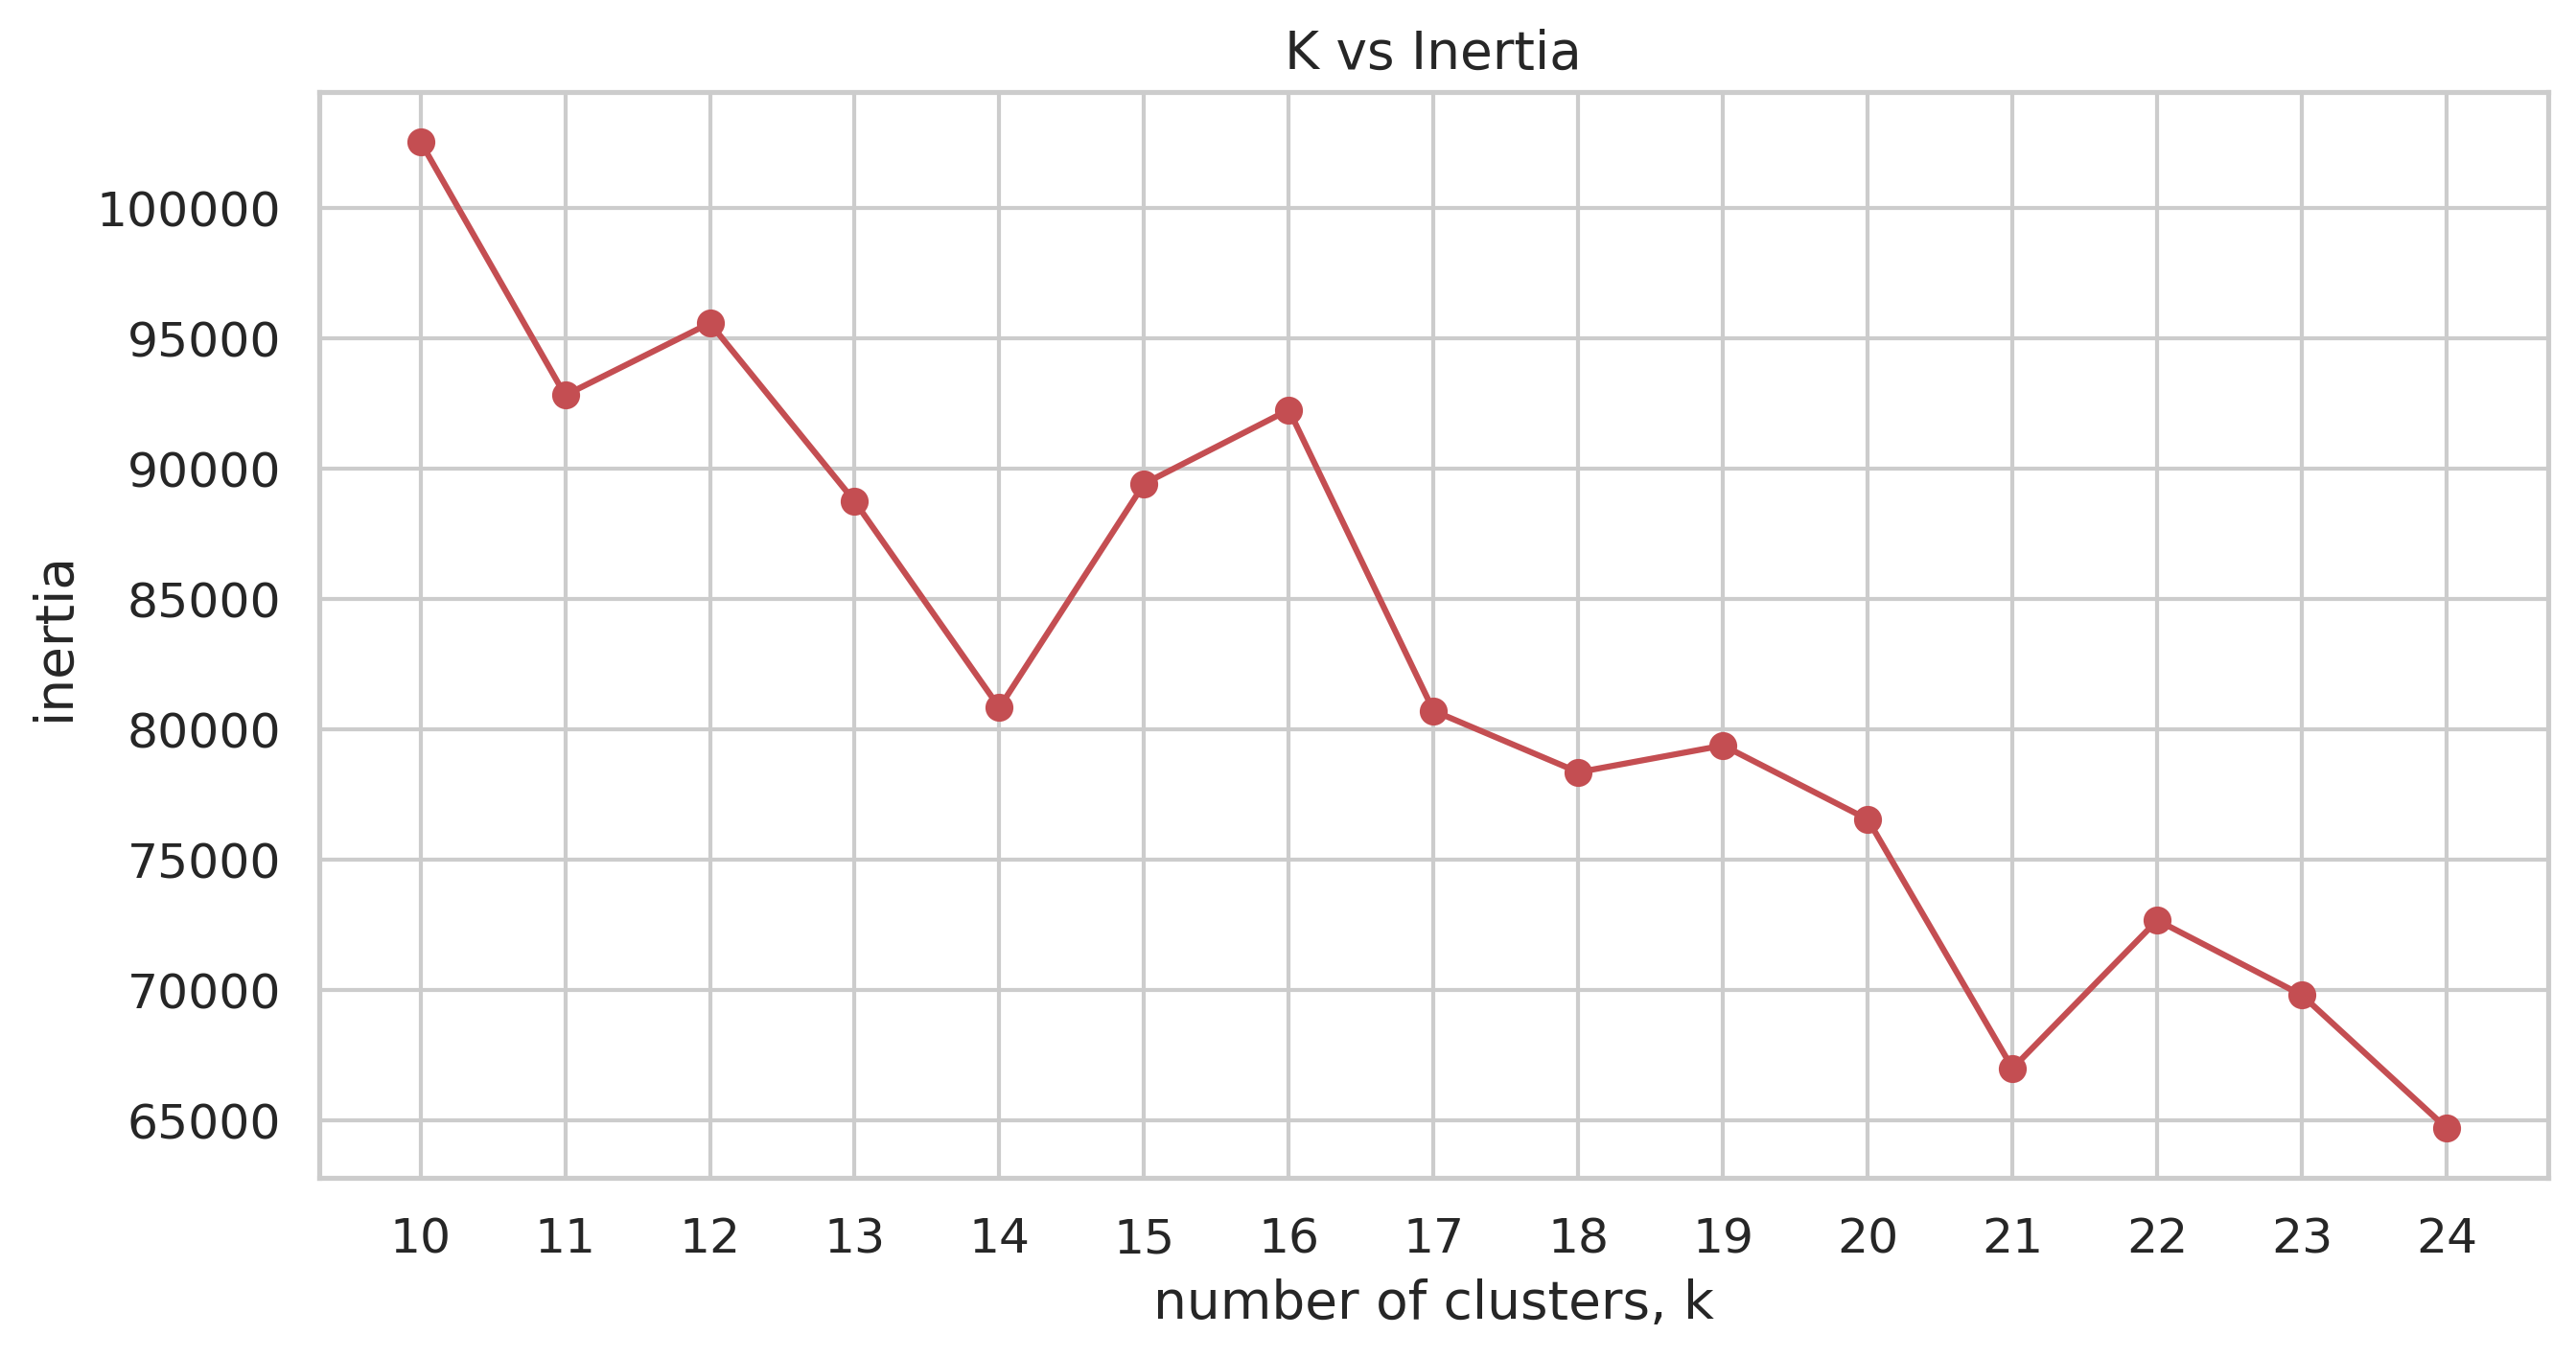

In [ ]:
K=range(10,25)
plt.plot(K, inertias, '-o', color='r')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title("K vs Inertia")
plt.xticks(K)
plt.savefig("/content/drive/MyDrive/Assignment 3/plots/"+"K vs Inertia.png")

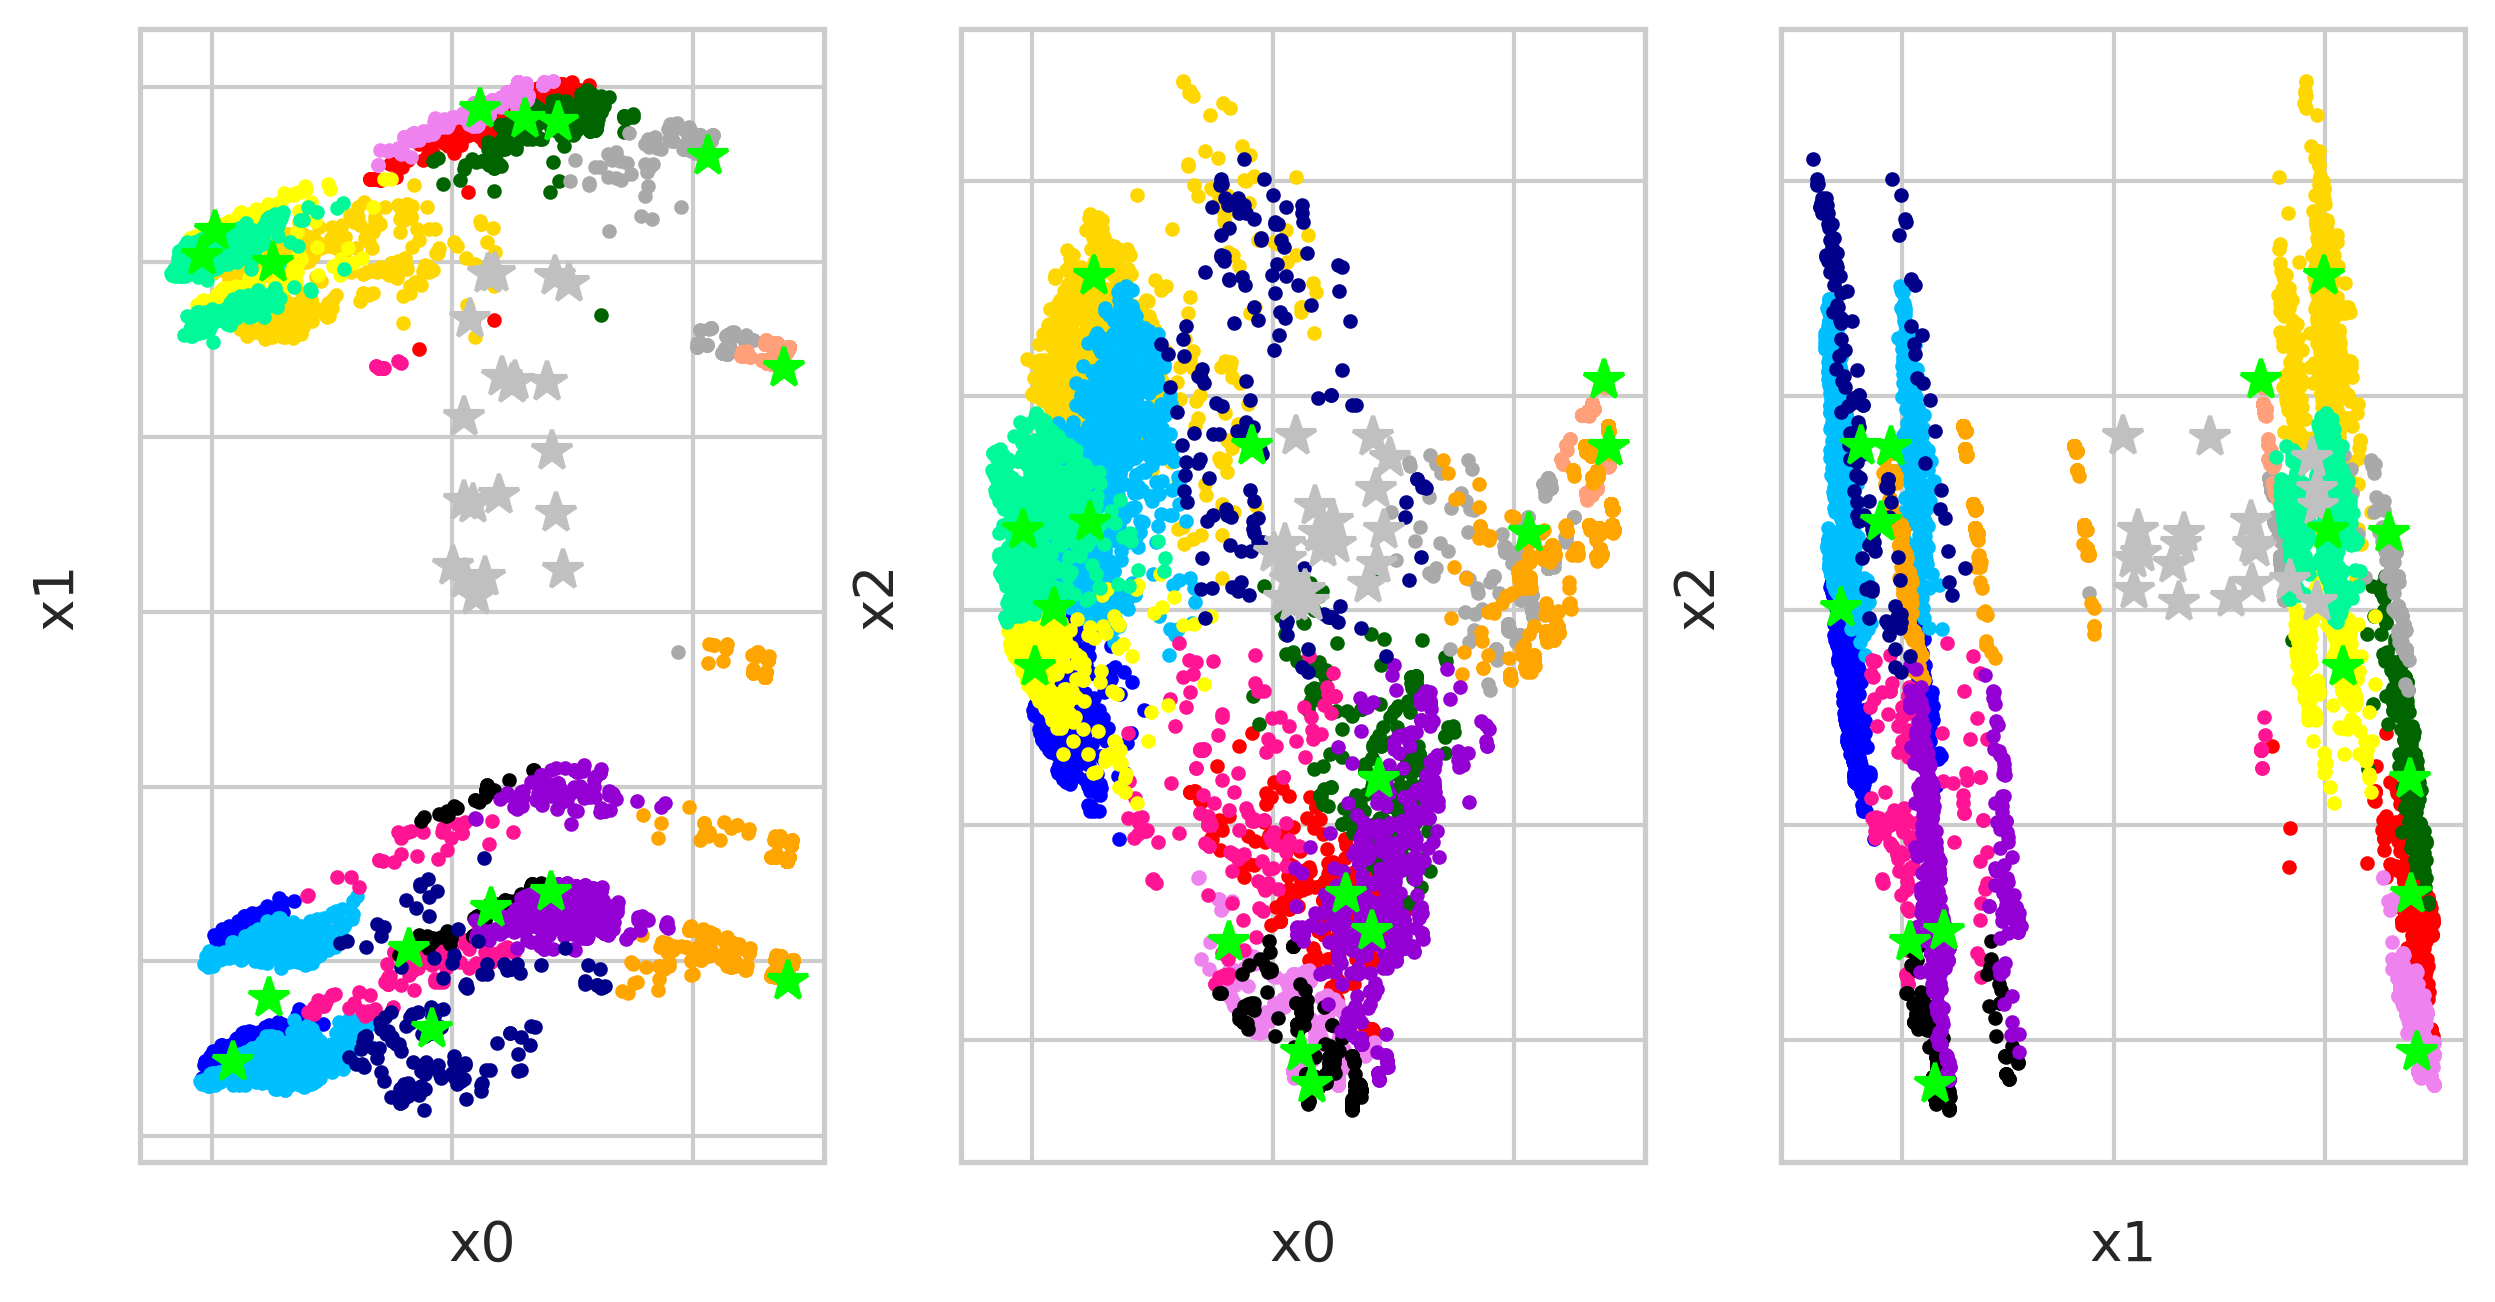

15

In [42]:
ls=[]
K=20
temp_df=pd.DataFrame(principalComponents).iloc[:10000,:3]
ls.append(K)
initial_medians = [ np.random.random(3) for _ in range(K)]
sample=temp_df.values.tolist()
ls.append(temp_df.values.tolist())
visual=[]
kmedians_instance = kmedians(sample, initial_medians)
visual.append(kmedians_instance)
ls.append(kmedians)
kmedians_instance.process()
ls.append(kmedians)
#print(ls)
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()
visual.append(clusters)
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, list(sample))
visualizer.append_cluster(initial_medians, marker='*', markersize=10)
visual.append(visualizer)
visualizer.append_cluster(medians, marker='*', markersize=10)
visualizer.show()